In [ ]:
Que1.-
Predict if a person would buy life insurance based on his age using logistic regression.
About Dataset - Age: Age of a person
bought_insurance : whether person buys Insurance or not (0 - No, 1 - Yes)
predict it for Age : 58,30,20,49,53

Dataset : insurance_data.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
x = df[["age"]]
y = df[["bought_insurance"]]

In [3]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()

In [11]:
model = model.fit(x,y)

C:\python 3.10\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
model.predict([[58],[30],[20],[49],[53]])

C:\python 3.10\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1, 1], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45,train_size=0.8)

In [17]:
model = model.fit(x_train,y_train)

C:\python 3.10\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 1], dtype=int64)

In [19]:
y_test

,bought_insurance
10,0
22,1
26,0
16,1
13,0
24,1


In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [21]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[3, 0],
       [2, 1]], dtype=int64)

In [22]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.6666666666666666

In [ ]:
Que2.-
In this dataset you have to predict that whether we have to give ATTORNEY to the clients or not 
(0=Yes, 1=No) based on below factors.
CLMAGE - Age of Client
CLMSEX - Sex of client (0=Male, 1= Female)
SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
LOSS - Loss that client faced

Prepare model by using logistic regression & Also calculate Accuracy by confusion matrix, 
Calculate accuracy score, precision score, recall score, f1 score, roc auc score, precision, 
recall and plot ROC Curve.

Dataset : Claimants.csv

In [23]:
df = pd.read_csv('claimants.csv')
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [26]:
x = df["CLMSEX"].mode()[0]
x

1.0

In [27]:
df["CLMSEX"].fillna(x,inplace=True)

In [29]:
df["CLMINSUR"].median()

1.0

In [28]:
x = df["CLMINSUR"].mode()[0]

0    1.0
Name: CLMINSUR, dtype: float64

In [30]:
df["CLMINSUR"].fillna(x,inplace=True)

In [33]:
df["SEATBELT"].fillna(df["SEATBELT"].mode()[0],inplace=True)

In [38]:
df["CLMAGE"].fillna(df["CLMAGE"].mean(),inplace=True)

In [39]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,0.488806,0.562687,0.910448,0.016418,28.414422,3.806307
std,0.500061,0.496240,0.285646,0.127124,18.816978,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,10.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,28.414422,1.069500
75%,1.000000,1.000000,1.000000,0.000000,40.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [41]:
x = df.drop("ATTORNEY",axis=1)
y = df["ATTORNEY"]

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=45)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1], dtype=int64)

In [44]:
y_test

422     0
315     1
193     1
581     1
1115    0
       ..
87      1
116     1
9       1
1090    1
724     0
Name: ATTORNEY, Length: 268, dtype: int64

In [56]:
from sklearn.metrics import confusion_matrix,auc,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [46]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 79,  54],
       [ 25, 110]], dtype=int64)

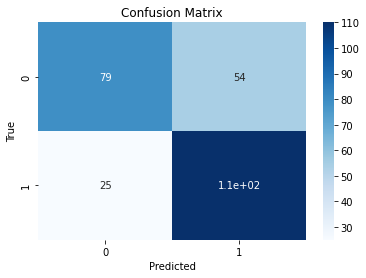

In [47]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP / (TP + FP)
Recall    = TP / (TP + FN)
print("Pricision:",precision)
print("Recall:",recall)

Pricision: 0.6707317073170732
Recall: 0.8148148148148148


In [49]:
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy Score:",accuracy)
precision = precision_score(y_test,y_predict)
print("Precision Score:",precision)
recall = recall_score(y_test,y_predict)
print("Recall Score:",recall)
f1 = f1_score(y_test,y_predict)
print("F1 Score:",f1)
roc_auc = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",roc_auc)



Accuracy Score: 0.7052238805970149
Precision Score: 0.6707317073170732
Recall Score: 0.8148148148148148
F1 Score: 0.7357859531772576
Roc Auc Score: 0.7043998886104149


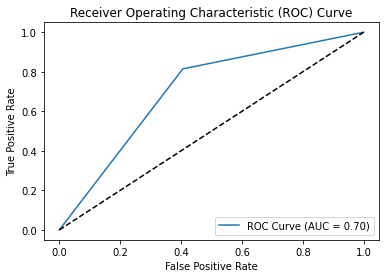

In [57]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
Que3.-

The models main purpose is to predict the 10-year risk of Coronary Heart Disease (CHD). 
CHD is a disease of the blood vessels supplying the heart. Heart disease has been the leading cause of
death worldwide since 1921. In 2008, 7.3 million people died from CHD. 
The classification goal is to predict whether the patient has 10-year risk of future coronary heart 
disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 
attributes.
Variables
Sex: male or female(0=female, 1=male)
Age: Age of the patient
education: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
Current Smoker: whether or not the patient is a current smoker (0=No, 1=Yes)
Cigs Per Day: the number of cigarettes that the person smoked on average in one day
BP Meds: whether or not the patient was on blood pressure medication 
Prevalent Stroke: whether or not the patient had previously had a stroke (0=No, 1=Yes)
Prevalent Hyp: whether or not the patient was hypertensive (0=No, 1=Yes)
Diabetes: whether or not the patient had diabetes (0=No, 1=Yes)
Tot Chol: total cholesterol level
Sys BP: systolic blood pressure 
Dia BP: diastolic blood pressure
BMI: Body Mass Index
Heart Rate: heart rate
Glucose: glucose level

Predict variable (desired target)
10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score,
f1 score, roc auc score, precision, recall and plot ROC Curve.

Datasets : framingham.csv


NOTES : 

1. Import the dataset.
2. Find out the shape of data.
3. Find out null values in all columns.
4. Drop all the null values.

In [60]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [63]:
df.shape

(4240, 16)

In [64]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


In [67]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


In [68]:
x = df.drop('TenYearCHD',axis=1)
y = df["TenYearCHD"]

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=45)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

C:\python 3.10\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
from sklearn.metrics import confusion_matrix,auc,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [72]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[631,   1],
       [ 92,   8]], dtype=int64)

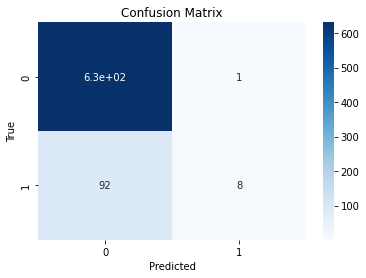

In [73]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [74]:
TP = cm[1,1]
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
Precision = TP / (TP + FP)
Recall    = TP / (TP + FN)
print("Pricision:",precision)
print("Recall:",recall)

Pricision: 0.6707317073170732
Recall: 0.8148148148148148


In [75]:
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy Score:",accuracy)
precision = precision_score(y_test,y_predict)
print("Precision Score:",precision)
recall = recall_score(y_test,y_predict)
print("Recall Score:",recall)
f1 = f1_score(y_test,y_predict)
print("F1 Score:",f1)
roc_auc = roc_auc_score(y_test,y_predict)
print("Roc Auc Score:",roc_auc)



Accuracy Score: 0.8729508196721312
Precision Score: 0.8888888888888888
Recall Score: 0.08
F1 Score: 0.14678899082568808
Roc Auc Score: 0.5392088607594937


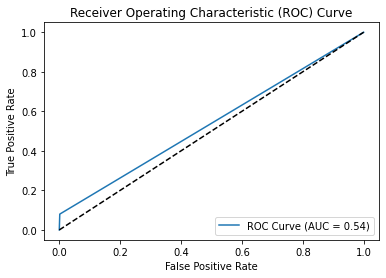

In [76]:
fpr, tpr, thresholds = roc_curve(y_test,y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()